# Parcial de FMIA
## Realizar un algoritmo que me permita identificar el latido cardiaco en una señal ECG utilizando patrones (características obtenidas de segmentos de la señal) utilizando como método o camino para ello redes neuronales artificiales (ANN).

### En este documento se explora formalizar el dataset que usara para el entrenamiento, por lo cual, se explora y analiza todo el contenido de las señales, para asi poder parametrizar y evaluar cuales son las caracteristicas  mas optimas para el entrenamiento


### NOTA: USAR ESTE VIDEO PARA EVITAR QUE LE TIRE ERROR DE QUE NO ALCANZAN LOS OUPUTS:
https://youtu.be/B_YlLf6fa5A


In [21]:
pip install wfdb #Esta libreria vista en clase permite acceder a funciones que nos permitiran el uso de las señales en su totalidad

Note: you may need to restart the kernel to use updated packages.


### Como es necesario trabajar con todas las señales solicitadas, lo mejor es hacer uso de un ciclo que nos permita recolectar todas las señales, asi como los archivos que los compone, como los son los atr, xws, hea y dat

In [22]:
import wfdb #importamos el manejo de señals
import pandas as pd #importamos pandas para asi al termminar exportar un dataser que usarmoes para el entrenamiento
import os #libreria operative system que permite acceder a funciones como de enlistado de archivos del sistema
import statistics #libreria de funciones matematicas que aportan al desarrollo del Dataset
import matplotlib.pyplot as plt #Liberia usada para la generacion de graficos, para realizar analisis de las señales
import numpy as np #libreria matematica, facilita el resultado de vectores compuestos
import statistics as stat #libreria estadistica, como hay funciones que numpy no puede cumplir, esta puede sulir esa necesida
from scipy import stats as s #Libreria matematica, que statistics, entrega funciones que hacen falta para el desarrollo de resultados vectoriales
from statistics import median #Importamos esecificamente este paquete de statistic para poder resolver ciertos datos en especial
 
   
listaContenido= os.listdir("C:/Users/andre/Downloads/content/")  #Si se va a correr el codigo e  collaba se recomienda poner "/content/" para el dir, si no, poner la ruta especifica que encuentra en su ordenador

listaContenido.sort() #Ordena de menor a mayor el listado de datos que se encuentra por el listdir, para asi poder recorrer la lista de mejor manera y clasificar los datos en posiciones que van a ser constante entre listas

listaDatos=[] #Esta lista funciona como contenedor de los nombre de las señales, sin tener en cuenta sus propiedades
listaatr=[] #Con esta lista se almacenaran los ATR
listaxws=[] #con esta lista se almacenara los XWS
listahea=[] #Con esta lista se almacenara los HEA
listadat=[] #con esta lista se almacenara los DAT
señales0=[] #Con esta lista se alamcenara la primera parte de la señal, dado que la señal se compone 2 partes
señales1=[] #con esta lista se almacenara la segunda parte de la señal

In [23]:
print(listaContenido)# muesta el contenido que contiene el dir que se encontro al hacer la operacion

['.ipynb_checkpoints', '16265.atr', '16265.dat', '16265.hea', '16265.xws', '16272.atr', '16272.dat', '16272.hea', '16272.xws', '16273.atr', '16273.dat', '16273.hea', '16273.xws', '16420.atr', '16420.dat', '16420.hea', '16420.xws', '16483.atr', '16483.dat', '16483.hea', '16483.xws', '16539.atr', '16539.dat', '16539.hea', '16539.xws', '16773.atr', '16773.dat', '16773.hea', '16773.xws', '16786.atr', '16786.dat', '16786.hea', '16786.xws', '16795.atr', '16795.dat', '16795.hea', '16795.xws', '17052.atr', '17052.dat', '17052.hea', '17052.xws', '17453.atr', '17453.dat', '17453.hea', '17453.xws', '18177.atr', '18177.dat', '18177.hea', '18177.xws', '18184.atr', '18184.dat', '18184.hea', '18184.xws', '19088.atr', '19088.dat', '19088.hea', '19088.xws', '19090.atr', '19090.dat', '19090.hea', '19090.xws', '19093.atr', '19093.dat', '19093.hea', '19093.xws', '19140.atr', '19140.dat', '19140.hea', '19140.xws', '19830.atr', '19830.dat', '19830.hea', '19830.xws', 'DataFramelatidos.csv', 'Parcial_de_IA.ip

In [24]:
#Este for recorrear todos loas archivos que se enceutnran en la lista dir, para asi poder comenzar a clasificar los documentos segun su extesnion en un lista, ademas que obtendremos el nombre de la señal para trabajar mas tarde
for i in listaContenido:
  if i.__contains__(".atr"):#se añade a la lista los de extension ATR
    listaDatos.append(i.replace(".atr","")) #como sabemos que los señales estan compuestas por varias extensiones, se tomo la decision que en la extension atr tambien se comenzaran a almacenar la señal que se esta trabajando
    listaatr.append(i) 
  elif i.__contains__(".xws"):#Se añade a la lista los de extension XWS
    listaxws.append(i) 
  elif i.__contains__(".hea"): #Se añade a la lista los de extension HEA
    listahea.append(i)
  elif i.__contains__(".dat"):#se añade a la lista los de extension DAT
    listadat.append(i)   

    
#Se imprimen todas las listas para asi poder obserar si los datos estan en la lisma posicion, pero en sus listas correspondiente, que como se puede ver en la impresion, asi es.
print(listaDatos)
print(listaatr)
print(listaxws)
print(listahea)
print(listadat)


['16265', '16272', '16273', '16420', '16483', '16539', '16773', '16786', '16795', '17052', '17453', '18177', '18184', '19088', '19090', '19093', '19140', '19830']
['16265.atr', '16272.atr', '16273.atr', '16420.atr', '16483.atr', '16539.atr', '16773.atr', '16786.atr', '16795.atr', '17052.atr', '17453.atr', '18177.atr', '18184.atr', '19088.atr', '19090.atr', '19093.atr', '19140.atr', '19830.atr']
['16265.xws', '16272.xws', '16273.xws', '16420.xws', '16483.xws', '16539.xws', '16773.xws', '16786.xws', '16795.xws', '17052.xws', '17453.xws', '18177.xws', '18184.xws', '19088.xws', '19090.xws', '19093.xws', '19140.xws', '19830.xws']
['16265.hea', '16272.hea', '16273.hea', '16420.hea', '16483.hea', '16539.hea', '16773.hea', '16786.hea', '16795.hea', '17052.hea', '17453.hea', '18177.hea', '18184.hea', '19088.hea', '19090.hea', '19093.hea', '19140.hea', '19830.hea']
['16265.dat', '16272.dat', '16273.dat', '16420.dat', '16483.dat', '16539.dat', '16773.dat', '16786.dat', '16795.dat', '17052.dat', '

In [25]:
#en este apratodo, recorremos la lista de señals para comenzar a almacenar todas las señaes
#Se obtiene que por señal cuando ocurre 1 segundo, hay un total de 128 datos
for i in listaDatos:
  

  pepito=wfdb.rdrecord(i)#se obtiene el record de la señal i, siendo i la señal obtenida en esa señal
  
  señales0.append(pepito.p_signal[:,0])#se almacena la señal 0 del record de la señal i
  señales1.append(pepito.p_signal[:,1])#Se alamcne la señal 1 del record de la señal i
  print(pepito.fs)#se imprime cuantos datos por segudo tiene la señal
 


128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


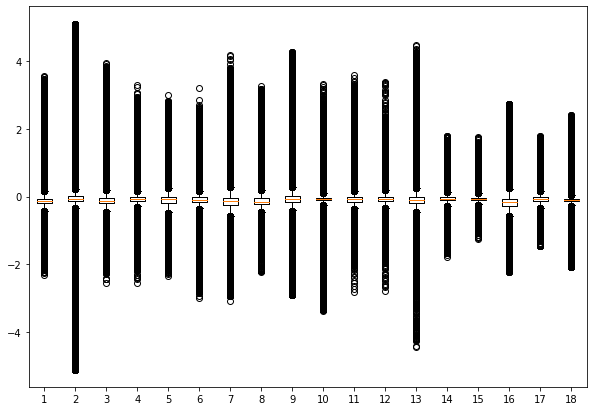

In [26]:
#realizamos un box plot o diagrama de cajas y bigotes para explorar la existencia e datos atipicos en la señal
fig = plt.figure(figsize =(10, 7))# se crea el espacio de la figura
 

plt.boxplot(señales0)#se añade la señal 0 a la figura al matplotlib para que asi pueda gnerar el diagrma

plt.show() # se representa el diagrama

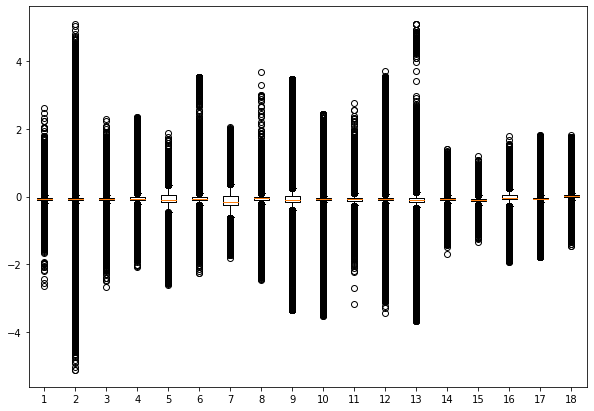

In [27]:
fig = plt.figure(figsize =(10, 7))
 

plt.boxplot(señales1)#se añade la señal 1 a la figura al matplotlib para que asi pueda gnerar el diagrma


plt.show()

In [28]:
#Este for se utiliza para explorar el primeramente cuatnas anotaciones de ocurrencias de latido ocurren, en donde ocurren, y cuantos latidos en si se prsentan
for i in listaDatos:
  anotaciones=wfdb.rdann(i,"atr").sample # se obtiene el sample de anotaciones ocurridas en la señal i
  print(anotaciones) #Se imprime el sample para saber las posiciones de la señal donde ocurre un latido
  print(len(anotaciones))#se imprime cuantos latidos en si ocurren en toda la señal

[       1       52      129 ... 10247715 10247823 10247936]
100955
[       1       73      199 ... 10802593 10802693 10802777]
97146
[      9      87     164 ... 9516519 9516612 9516699]
90097
[     68     148     228 ... 9953381 9953468 9953510]
102436
[     18      99     178 ... 9740551 9740634 9740719]
104561
[      72      168      268 ... 10837587 10837734 10837764]
108674
[       1       50       90 ... 10002106 10002148 10002201]
112897
[      16       87      195 ... 10758439 10758536 10758639]
101739
[     11      58     118 ... 9567523 9567587 9567651]
87678
[     35     150     264 ... 9779088 9779185 9779269]
88002
[      1      93     182 ... 9533641 9533735 9533793]
101173
[      54      122      190 ... 10377129 11169423 11178268]
117004
[      1      78     175 ... 9639200 9639344 9639488]
102672
[      1      36     100 ... 9294409 9294493 9294532]
117880
[     11      75     139 ... 8861856 8861963 8862027]
81953
[      1      62     126 ... 9246183 9246278 9246306]


In [29]:
#como sabemos que la señales tiene un total de 128 datos pro segundo, podemos saber en si, cuantos segundos ocurren por señal
for i in señales0:
  print(len(i)/128)# se hace la proporcion de datos por datos por segundo para encontrar el total de seg por señal para ir analizando si las señales se encuentran cercanas a los mismos tiempos
  

91648.0
90000.0
88704.0
86336.0
93440.0
88496.0
86304.0
88160.0
84896.0
83280.0
87776.0
93440.0
85488.0
85680.0
87056.0
83640.0
87024.0
83608.0


## El número de características a evaluar debe ser mayor a 5, sin límite máximo de cantidad de ellas.

# NOTA: Este algoritmo se realizará sin desplazamiento de una ventana deslizante. Es decir, se realizará dentro de un conjunto de datos, en donde este debe contener las características y la salida o categoría de estas características (tal como en la base de datos de cancer)

In [30]:
#son 128 muestras por segundo, por ende para sacar la cantidad de muestras en x tiempo se debe multiplicar por el tiempo que quiero saner cuantas muestras existen

#Si seguimos la ecuacion, entonces si existe 128 muestras por segundo, si usamos 0,15 seg de muestra, entonces obtenemos 20 muestras en solo 0,15 seg.
FilasDataSet=[]# generamos una lista que alamcena los datos que obtendremos de cada latido para el entrenamiento



for i in listaDatos:# se usa un recorrido sobre toda las lista de datos para poder recorrer todos los latidos por señal
    print(i)#imprime el numero de la señal
    anotaciones=wfdb.rdann(i,"atr").sample #se obtiene el smple de la señal para poder obtener cuando ocurre un latido
    
    pepito=wfdb.rdrecord(i)# se obtiene la señal
    signals=pepito.p_signal#se toma la muestra de la señal en si
    signals0=signals[:,0]#se usa la parte 1 que tomaremos como señal 0
    for j in anotaciones:#se recorre las posiciones donde ocurre un latido
        filaActual=[]#Se crea una fila temporal, que sirve como un medio de alamacenar las lineas del dataset
        if anotaciones[0]==j:#La primera posicion de los latidos se piensa obciar, dado que la ventana de observacion es de 20, y como usualmente l primera posicion del latido es 1, puede que cuando se aplique la ventana no pueda ocupar en si la ventana
            #print("Si")
            continue   
        elif anotaciones[-1]==j:#Lo mismo ocurre con la ultima posicion, si el latido en la ultima posicion no tiene un espacio extenso para ventana, puede tirar error
            break
        else:
            #si no se cumple ninguna de las condiciones anterioires, se comienza a sacar las 6 dinamicas importantes
            

            Vboser=signals0[int(i)-10:int(i)+10] # se obtiene la veatna de 20 de la señal en la posicion i
            #print(Vboser)
            media=float(np.mean(Vboser))#se obtiene la media de la ventana
            #print(media)
            moda=float(s.mode(Vboser)[0])#se obtiene la moda de la ventana, en la posicion 0, dado que pude que se tenga 2 resultados modales
            #print(moda)
            mediana=float(np.median(Vboser)) #Se obtiene la mediana de los datos
            medianaAlta=float(statistics.median_high(Vboser)) #Se obtiene la median alata de los datos 
            
            kurtosis=np.std(Vboser) #Se obtiene la kurtosis de los datos
            
            Desviacion=statistics.pstdev(Vboser) #Se obtiene la desviacion de los daos
            
            # las siguientes 6 lienas se añaden a la lista para funcionar como lienas del dataset
            filaActual.append(media) 
            filaActual.append(mediana)
            filaActual.append(medianaAlta)
            filaActual.append(moda)
            filaActual.append(kurtosis)
            filaActual.append(Desviacion)
            filaActual.append(1)#Esta linea no se obtiene en si de ninguna medida, asumimos que este dato es 1, dado que, la lista de anotaciones nos da las posiciones que son en si latidos, y como ocurre un latido, para el entrenamiento este valor debe ser de 1
            
        FilasDataSet.append(filaActual)# se añade la fila a la lista

16265
16272
16273
16420
16483
16539
16773
16786
16795
17052
17453
18177
18184
19088
19090
19093
19140
19830


In [31]:
print(len(FilasDataSet))# se obtiene el tamaño de la lista para saber en si cuantos datos de latidos obtuvimos
#print(FilasDataSet[1])#tomamos un pequeño tamaño de la muestra para hacernos idea de como funciona en si y como se almacenara

1806756
[-0.10750000000000001, -0.115, -0.115, -0.145, 0.05760859310901456, 0.05760859310901456, 1]


In [32]:
#Este bloque de codigo funciona e la misma manera, pero cambia en algunos sentidos para que podamos obtener los datos de un no latido
#como es necesario obtener los datos que no son latidos peo se deben tomar de manera epsecifica, se usan datos  aletaorios en una ventana para asegurar que el dato sea ideal

for i in listaDatos:
    #print(i)
    anotaciones=wfdb.rdann(i,"atr").sample
    
    pepito=wfdb.rdrecord(i)
    signals=pepito.p_signal
    signals0=signals[:,0]
    for j in range (0,len(anotaciones)): # se recorre las anotaciones, pero no en la sposiciones especificas de los latidos, si no que se recorre todo en si
        
        if anotaciones[0]==j:
            #print("Si")
            continue   
        elif anotaciones[-1]==j:
            break
        else:
            try:
                
                    #print("Entre")
                    filaActual=[]
                    #print(anotaciones[i])
                    posicionAleatoria=random.randint(anotaciones[int(i)]+20, anotaciones[int(i)+1]-20)# para poder asegurar la aleatoriedad de las posciones y que nno se superponga con los datos del latido, se usa una restriccion de los datos
                    #se desliza la ventana 40 posiciones, 20 mas haya de la posicion i y 20 menos en la posicion i+1. es decir, si i es 20,y i+1 es 200, la ventana quedara en 40 y 180, esto permite elegir un dato entre esa ventana que no se soberponga en un latido 
                    #print(posicionAleatoria)

                    Vboser=signals0[posicionAleatoria-10:posicionAleatoria+10]
                    #print(Vboser)
                    media=float(np.mean(Vboser))
                    #print(media)
                    moda=float(s.mode(Vboser)[0])
                    #print(moda)
                    mediana=float(np.median(Vboser))
                    medianaAlta=float(statistics.median_high(Vboser))
                    kurtosis=np.std(Vboser)

                    Desviacion=statistics.pstdev(Vboser)

                    filaActual.append(media)
                    filaActual.append(mediana)
                    filaActual.append(medianaAlta)
                    filaActual.append(moda)
                    filaActual.append(kurtosis)
                    filaActual.append(Desviacion)
                    filaActual.append(0)# Otro cmabio es, que el dato se considera un no latido, por lo cual se añade como  0 para el entrenamiento
                    #print(len(filaActual))
                    
        
                    FilasDataSet.append(filaActual)
            except:
                continue
           

In [33]:
print(FilasDataSet[-1])

[-0.0915, -0.09, -0.085, -0.035, 0.04552746423863292, 0.04552746423863292, 0]


In [34]:
print(len(FilasDataSet)) #Se imprime el total del tamaño del dataset

3613530


In [35]:
DataFramelatidos = pd.DataFrame(FilasDataSet, columns = ['Media','Mediana','Mediana Alta','Moda',"Kurtosis","Desviacion Estandar","Outcome"])
#esta linea permite dar los datos como un dataframe de pandas, dando como columnas los datos que selccionamos, y las filas son de la lista que obtuvimos
DataFramelatidos # se presenta el dato

,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar,Outcome
0,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
1,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
2,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
3,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
4,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
...,...,...,...,...,...,...,...
3613525,-0.0855,-0.090,-0.085,-0.115,0.038141,0.038141,0
3613526,-0.1285,-0.145,-0.135,-0.205,0.064597,0.064597,0
3613527,-0.1025,-0.105,-0.105,-0.115,0.016993,0.016993,0
3613528,-0.1285,-0.145,-0.135,-0.205,0.064597,0.064597,0


In [36]:
DataFramelatidosCopia=DataFramelatidos# se hace una copia de los datos para evitar dañar la fuetne original
DataFramelatidosCopia

,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar,Outcome
0,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
1,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
2,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
3,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
4,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
...,...,...,...,...,...,...,...
3613525,-0.0855,-0.090,-0.085,-0.115,0.038141,0.038141,0
3613526,-0.1285,-0.145,-0.135,-0.205,0.064597,0.064597,0
3613527,-0.1025,-0.105,-0.105,-0.115,0.016993,0.016993,0
3613528,-0.1285,-0.145,-0.135,-0.205,0.064597,0.064597,0


<AxesSubplot:>

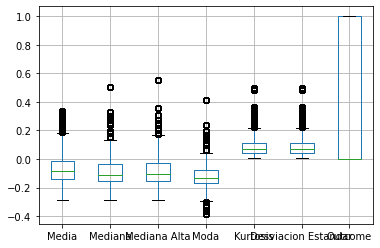

In [37]:
DataFramelatidosCopia.boxplot() #obtenemos los datos en un boxplot para ver la cantidad de atipicos que se encuentra en el dataframe

In [38]:
DataFramelatidosCopia.corr()# se imprime una matriz de correlacion para ver cual es la correlacion de los datos

,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar,Outcome
Media,1.000000,0.951229,0.949588,0.367388,0.647278,0.647278,0.135955
Mediana,0.951229,1.000000,0.999089,0.288767,0.532701,0.532701,0.102471
Mediana Alta,0.949588,0.999089,1.000000,0.269153,0.545473,0.545473,0.103325
Moda,0.367388,0.288767,0.269153,1.000000,-0.137283,-0.137283,-0.095694
Kurtosis,0.647278,0.532701,0.545473,-0.137283,1.000000,1.000000,0.297075
Desviacion Estandar,0.647278,0.532701,0.545473,-0.137283,1.000000,1.000000,0.297075
Outcome,0.135955,0.102471,0.103325,-0.095694,0.297075,0.297075,1.000000


In [39]:
""""
for i in DataFramelatidosCopia.columns[0:-1]:
    print(i)
"""

'"\nfor i in DataFramelatidosCopia.columns[0:-1]:\n    print(i)\n'

In [40]:
"""
for i in DataFramelatidosCopia.columns[0:-1]:
    q_low = DataFramelatidosCopia[i].quantile(0.20)
    q_hi  = DataFramelatidosCopia[i].quantile(0.80)

    DataFramelatidosCopia = DataFramelatidosCopia[(DataFramelatidosCopia[i] < q_hi) & (DataFramelatidosCopia[i] > q_low)]
    DataFramelatidosCopia
    
    for i in DataFramelatidosCopia.columns[0:-1]:
  #print(datosDeCancerCopia)
  #print(i)
    q1 = np.percentile(DataFramelatidosCopia[i], 30,
               interpolation  = 'midpoint')
    q3 = np.percentile(DataFramelatidosCopia[i], 70,
               interpolation  = 'midpoint')
    iqr=q3-q1

  #upper = np.where(datosDeCancerCopia[i] >= (q3 + 1.5 * iqr))

  #lower = np.where(datosDeCancerCopia[i] <= (q1 - 1.5 * iqr))
  #fence_low  = q1-3*iqr
  #fence_high = q3+3*iqr
  #datosDeCancerCopia = datosDeCancerCopia.loc[(datosDeCancerCopia[i] > fence_low) & (datosDeCancerCopia[i] < fence_high)]

    upper = np.where(DataFramelatidosCopia[i] >= (q3 + (1.5 * iqr)))

    lower = np.where(DataFramelatidosCopia[i] <= (q1 - (1.5 * iqr)))
  #print(upper)
  #print(lower)
  
    for j in upper[0]:
    #print(j)
        DataFramelatidosCopia[i].drop(j, inplace = True)
  
    for j in lower[0]:
        DataFramelatidosCopia[i].drop(j, inplace = True)
    DataFramelatidosCopia[i].reset_index(drop=True, inplace=True)
"""    


"\nfor i in DataFramelatidosCopia.columns[0:-1]:\n    q_low = DataFramelatidosCopia[i].quantile(0.20)\n    q_hi  = DataFramelatidosCopia[i].quantile(0.80)\n\n    DataFramelatidosCopia = DataFramelatidosCopia[(DataFramelatidosCopia[i] < q_hi) & (DataFramelatidosCopia[i] > q_low)]\n    DataFramelatidosCopia\n    \n    for i in DataFramelatidosCopia.columns[0:-1]:\n  #print(datosDeCancerCopia)\n  #print(i)\n    q1 = np.percentile(DataFramelatidosCopia[i], 30,\n               interpolation  = 'midpoint')\n    q3 = np.percentile(DataFramelatidosCopia[i], 70,\n               interpolation  = 'midpoint')\n    iqr=q3-q1\n\n  #upper = np.where(datosDeCancerCopia[i] >= (q3 + 1.5 * iqr))\n\n  #lower = np.where(datosDeCancerCopia[i] <= (q1 - 1.5 * iqr))\n  #fence_low  = q1-3*iqr\n  #fence_high = q3+3*iqr\n  #datosDeCancerCopia = datosDeCancerCopia.loc[(datosDeCancerCopia[i] > fence_low) & (datosDeCancerCopia[i] < fence_high)]\n\n    upper = np.where(DataFramelatidosCopia[i] >= (q3 + (1.5 * iqr)))\

In [41]:
DataFramelatidosCopia.to_csv(r'C:/Users/andre/Downloads/content/DataFramelatidos.csv', index=False) # se exporta el data frame como un csv a la ruta asiganda
#Este documento continua con: "Entrenamiento y Analisis de ANN del parcial de IA"